# Preamble

In [1]:
#start by importing some needed modules
#You may see some warnings... unless it spits out an error, you can ignore them!
import tangos as db
import numpy as np
import pynbody
import matplotlib.pyplot as plt
from array import array
import pickle
import statistics as st
plt.ion()

#Set up some properties to make the plots look nice
plt.rcParams['figure.figsize'] = (12, 9) #set figure size
plt.rcParams['font.size'] = 20 #set font size so things are readible and not too small or bit
plt.rcParams['font.family'] = 'sans-serif' # just a font preference here
plt.rcParams['xtick.major.size'] = 10 #size and widths of major/minor tick marks on plots
plt.rcParams['xtick.major.width'] = 2
plt.rcParams['ytick.major.size'] = 10
plt.rcParams['ytick.major.width'] = 2
plt.rcParams['xtick.minor.size'] = 5
plt.rcParams['xtick.minor.width'] = 1
plt.rcParams['ytick.minor.size'] = 5
plt.rcParams['ytick.minor.width'] = 1


#load in the database simulation (also a good check that you are reading the right database file!)
sim = db.get_simulation('cosmo25')

In [2]:
##getting the last time step
step = db.get_timestep('cosmo25/%8192')

In [3]:
solar_metal = 0.0134

# Data

In [4]:
f = open('./Data/stellar_metal_BH.pkl', 'rb')
stellar_metal_BH_data = pickle.load(f)
f.close

f = open('./Data/gas_metal_BH.pkl', 'rb')
gas_metal_BH_data = pickle.load(f)
f.close()

f = open('./Data/stellar_metal.pkl', 'rb')
stellar_metal_data = pickle.load(f)
f.close()

f = open('./Data/gas_metal.pkl', 'rb')
gas_metal_data = pickle.load(f)
f.close()

f = open('./Data/gas_metal_prof_cut.pkl', 'rb')
gas_metal_prof_cut_data = pickle.load(f)
f.close()

f = open('./Data/stellar_SFR_data.pkl', 'rb')
SFR_data = pickle.load(f)
f.close()

f = open('./Data/SFR_data.pkl', 'rb')
saved_SFR_data = pickle.load(f)
f.close()

# Main

In [5]:
all_halo_numbers = np.array(gas_metal_data['halo_number'])
halo_with_BH = np.unique(step.calculate_all('host_halo.halo_number()')[0])

BH_halo_ind = np.where(np.in1d(all_halo_numbers, halo_with_BH))
halo_no_BH_ind = np.where(np.in1d(all_halo_numbers, halo_with_BH, invert = True))

In [6]:
with_BH = all_halo_numbers[BH_halo_ind]
no_BH = all_halo_numbers[halo_no_BH_ind]

In [7]:
BH_gas_metal = gas_metal_BH_data['BH_gas_metal']
BH_stellar_metal = stellar_metal_BH_data['BH_stellar_metal']

stellar_metal_all = stellar_metal_data['tot_stellar_metal']
gas_metal_all = gas_metal_data['tot_gas_metal']

no_BH_stellar_metal = stellar_metal_all[halo_no_BH_ind]
no_BH_gas_metal = stellar_metal_all[halo_no_BH_ind]

In [8]:
stellar_mass = stellar_metal_data['tot_stellar_mass']

# Control

In [9]:
gas_ind_6 = np.where(stellar_mass <= 1e6)
gas_ind_7 = np.where((stellar_mass <= 1e7) & (stellar_mass >= 1e6))
gas_ind_8 = np.where((stellar_mass <= 1e8) & (stellar_mass >= 1e7))
gas_ind_9 = np.where((stellar_mass <= 1e9) & (stellar_mass >= 1e8))
gas_ind_10 = np.where((stellar_mass <= 1e10) & (stellar_mass >= 1e9))
gas_ind_11 = np.where((stellar_mass <= 1e11) & (stellar_mass >= 1e10))
gas_ind_12 = np.where((stellar_mass <= 1e12) & (stellar_mass >= 1e11))

In [10]:
mass_6 = stellar_mass[gas_ind_6]
mass_7 = stellar_mass[gas_ind_7]
mass_8 = stellar_mass[gas_ind_8]
mass_9 = stellar_mass[gas_ind_9]
mass_10 = stellar_mass[gas_ind_10]
mass_11 = stellar_mass[gas_ind_11]
mass_12 = stellar_mass[gas_ind_12]

stellar_mass_cut = []
stellar_mass_cut = np.append(stellar_mass_cut, mass_6)
stellar_mass_cut = np.append(stellar_mass_cut, mass_7)
stellar_mass_cut = np.append(stellar_mass_cut, mass_8)
stellar_mass_cut = np.append(stellar_mass_cut, mass_9)
stellar_mass_cut = np.append(stellar_mass_cut, mass_10)
stellar_mass_cut = np.append(stellar_mass_cut, mass_11)
stellar_mass_cut = np.append(stellar_mass_cut, mass_12)

In [11]:
star_mass_med_6 = np.median(mass_6)
star_mass_med_7 = np.median(mass_7)
star_mass_med_8 = np.median(mass_8)
star_mass_med_9 = np.median(mass_9)
star_mass_med_10 = np.median(mass_10)
star_mass_med_11 = np.median(mass_11)
star_mass_med_12 = np.median(mass_12)

star_mass_med = []
star_mass_med = np.append(star_mass_med, star_mass_med_6)
star_mass_med = np.append(star_mass_med, star_mass_med_7)
star_mass_med = np.append(star_mass_med, star_mass_med_8)
star_mass_med = np.append(star_mass_med, star_mass_med_9)
star_mass_med = np.append(star_mass_med, star_mass_med_10)
star_mass_med = np.append(star_mass_med, star_mass_med_11)
star_mass_med = np.append(star_mass_med, star_mass_med_12)

## Gas

In [12]:
gas_metal_6 = gas_metal_all[gas_ind_6]
gas_metal_7 = gas_metal_all[gas_ind_7]
gas_metal_8 = gas_metal_all[gas_ind_8]
gas_metal_9 = gas_metal_all[gas_ind_9]
gas_metal_10 = gas_metal_all[gas_ind_10]
gas_metal_11 = gas_metal_all[gas_ind_11]
gas_metal_12 = gas_metal_all[gas_ind_12]

gas_metal_cut = []
gas_metal_cut = np.append(gas_metal_cut, gas_metal_6)
gas_metal_cut = np.append(gas_metal_cut, gas_metal_7)
gas_metal_cut = np.append(gas_metal_cut, gas_metal_8)
gas_metal_cut = np.append(gas_metal_cut, gas_metal_9)
gas_metal_cut = np.append(gas_metal_cut, gas_metal_10)
gas_metal_cut = np.append(gas_metal_cut, gas_metal_11)
gas_metal_cut = np.append(gas_metal_cut, gas_metal_12)

In [13]:
gas_met_med_6 = np.median(gas_metal_6)
gas_met_med_7 = np.median(gas_metal_7)
gas_met_med_8 = np.median(gas_metal_8)
gas_met_med_9 = np.median(gas_metal_9)
gas_met_med_10 = np.median(gas_metal_10)
gas_met_med_11 = np.median(gas_metal_11)
gas_met_med_12 = np.median(gas_metal_12)

gas_median = []
gas_median = np.append(gas_median, gas_met_med_6)
gas_median = np.append(gas_median, gas_met_med_7)
gas_median = np.append(gas_median, gas_met_med_8)
gas_median = np.append(gas_median, gas_met_med_9)
gas_median = np.append(gas_median, gas_met_med_10)
gas_median = np.append(gas_median, gas_met_med_11)
gas_median = np.append(gas_median, gas_met_med_12)

In [14]:
num_6 = all_halo_numbers[gas_ind_6]
num_7 = all_halo_numbers[gas_ind_7]
num_8 = all_halo_numbers[gas_ind_8]
num_9 = all_halo_numbers[gas_ind_9]
num_10 = all_halo_numbers[gas_ind_10]
num_11 = all_halo_numbers[gas_ind_11]
num_12 = all_halo_numbers[gas_ind_12]

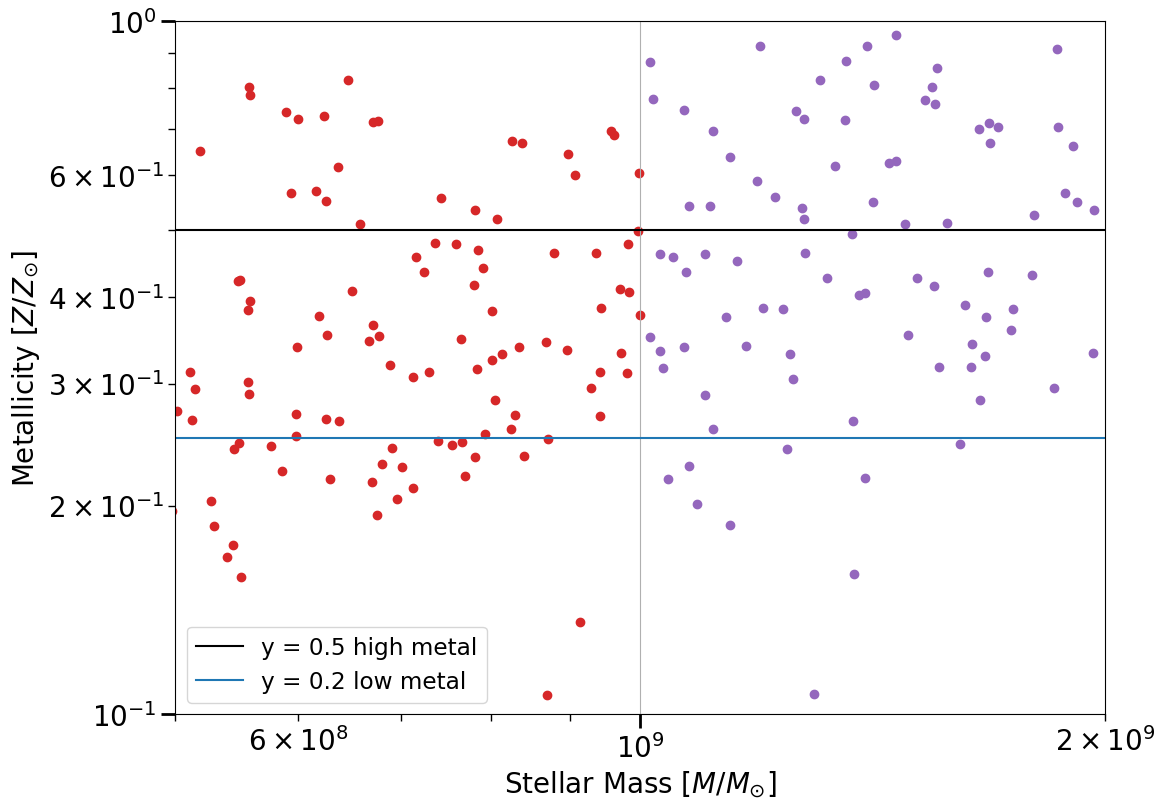

In [99]:
plt.scatter(mass_6, gas_metal_6/solar_metal)
plt.scatter(mass_7, gas_metal_7/solar_metal)
plt.scatter(mass_8, gas_metal_8/solar_metal)
plt.scatter(mass_9, gas_metal_9/solar_metal)
plt.scatter(mass_10, gas_metal_10/solar_metal)
plt.scatter(mass_11, gas_metal_11/solar_metal)
plt.scatter(mass_12, gas_metal_12/solar_metal)

plt.axhline(y = 0.5, color = 'black', label = 'y = 0.5 high metal')
plt.axhline(y = 0.25, label = 'y = 0.2 low metal')


plt.xscale('log')
plt.yscale('log')

#plt.xlim(1e5, 1e12)
#plt.ylim(1e-4, 1e1)

plt.xlim([5e8, 2e9])
plt.ylim([1e-1, 1e0])

plt.xlabel('Stellar Mass $[M/M_{\odot}]$')
plt.ylabel('Metallicity $[Z/Z_{\odot}]$')

plt.legend(fontsize = "small")
plt.grid()
#plt.show()
plt.savefig("./Pictures/Gas_cut_zoom_1.png", bbox_inches='tight') 

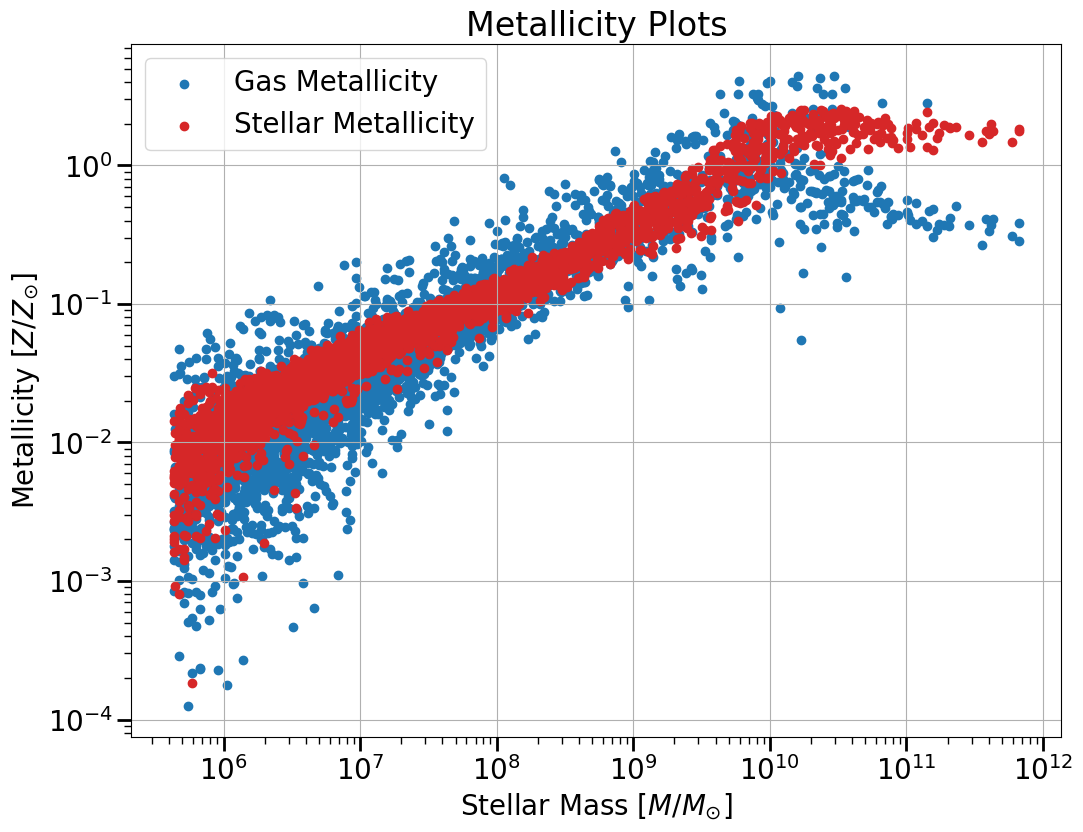

In [16]:
plt.scatter(stellar_mass, gas_metal_all/solar_metal, label = 'Gas Metallicity', c = 'tab:blue')
plt.scatter(stellar_mass, stellar_metal_all/solar_metal, label = 'Stellar Metallicity', c = 'tab:red')

plt.xscale('log')
plt.yscale('log')

plt.title('Metallicity Plots')
plt.xlabel('Stellar Mass $[M/M_{\odot}]$')
plt.ylabel('Metallicity $[Z/Z_{\odot}]$')

plt.legend()
plt.grid()
#plt.show()
plt.savefig("./Pictures/METAL.png", bbox_inches='tight') 

In [17]:
BH_gas_ind_high_6 = np.where(BH_gas_metal >= gas_met_med_6)
BH_gas_ind_high_7 = np.where(BH_gas_metal >= gas_met_med_7)
BH_gas_ind_high_8 = np.where(BH_gas_metal >= gas_met_med_8)
BH_gas_ind_high_9 = np.where(BH_gas_metal >= gas_met_med_9)
BH_gas_ind_high_10 = np.where(BH_gas_metal >= gas_met_med_10)
BH_gas_ind_high_11 = np.where(BH_gas_metal >= gas_met_med_11)
BH_gas_ind_high_12 = np.where(BH_gas_metal >= gas_met_med_12)

BH_gas_met_high_6 = BH_gas_metal[BH_gas_ind_high_6]
BH_gas_met_high_7 = BH_gas_metal[BH_gas_ind_high_7]
BH_gas_met_high_8 = BH_gas_metal[BH_gas_ind_high_8]
BH_gas_met_high_9 = BH_gas_metal[BH_gas_ind_high_9]
BH_gas_met_high_10 = BH_gas_metal[BH_gas_ind_high_10]
BH_gas_met_high_11 = BH_gas_metal[BH_gas_ind_high_11]
BH_gas_met_high_12 = BH_gas_metal[BH_gas_ind_high_12]

In [18]:
Mstar_all, halo_num = step.calculate_all('Mstar', 'halo_number()')

In [19]:
BH_num_high_6 = with_BH[BH_gas_ind_high_6]
BH_num_high_7 = with_BH[BH_gas_ind_high_7]
BH_num_high_8 = with_BH[BH_gas_ind_high_8]
BH_num_high_9 = with_BH[BH_gas_ind_high_9]
BH_num_high_10 = with_BH[BH_gas_ind_high_10]
BH_num_high_11 = with_BH[BH_gas_ind_high_11]
BH_num_high_12 = with_BH[BH_gas_ind_high_12]

In [20]:
BH_num_high_tot = []
BH_num_high_tot = np.append(BH_num_high_tot, BH_num_high_6)
BH_num_high_tot = np.append(BH_num_high_tot, BH_num_high_7)
BH_num_high_tot = np.append(BH_num_high_tot, BH_num_high_8)
BH_num_high_tot = np.append(BH_num_high_tot, BH_num_high_9)
BH_num_high_tot = np.append(BH_num_high_tot, BH_num_high_10)
BH_num_high_tot = np.append(BH_num_high_tot, BH_num_high_11)
BH_num_high_tot = np.append(BH_num_high_tot, BH_num_high_12)

BH_num_high_tot = np.unique(BH_num_high_tot)

In [21]:
BH_num_high_tot = BH_num_high_tot.astype(int)

In [22]:
saved_SFR_data.keys()

dict_keys(['SFR_master', 'no_BH_high', 'no_BH_low', 'BH_high', 'BH_low', 'Mstar_low', 'Mstar_high', 'Mstar_BH_low', 'Mstar_BH_high'])

In [23]:
SFR_master = saved_SFR_data['SFR_master']

In [24]:
SFR_BH_high = SFR_master[BH_num_high_tot - 1]
Mstar_BH_high = Mstar_all[BH_num_high_tot - 1]

In [25]:
BH_gas_met_high = []
BH_gas_met_high = np.append(BH_gas_met_high, BH_gas_met_high_6)
BH_gas_met_high = np.append(BH_gas_met_high, BH_gas_met_high_7)
BH_gas_met_high = np.append(BH_gas_met_high, BH_gas_met_high_8)
BH_gas_met_high = np.append(BH_gas_met_high, BH_gas_met_high_9)
BH_gas_met_high = np.append(BH_gas_met_high, BH_gas_met_high_10)
BH_gas_met_high = np.append(BH_gas_met_high, BH_gas_met_high_11)
BH_gas_met_high = np.append(BH_gas_met_high, BH_gas_met_high_12)

In [26]:
BH_gas_high_med_6 = np.median(BH_gas_met_high_6)
BH_gas_high_med_7 = np.median(BH_gas_met_high_7)
BH_gas_high_med_8 = np.median(BH_gas_met_high_8)
BH_gas_high_med_9 = np.median(BH_gas_met_high_9)
BH_gas_high_med_10 = np.median(BH_gas_met_high_10)
BH_gas_high_med_11 = np.median(BH_gas_met_high_11)
BH_gas_high_med_12 = np.median(BH_gas_met_high_12)

BH_gas_med_high = []
BH_gas_med_high = np.append(BH_gas_med_high, BH_gas_high_med_6)
BH_gas_med_high = np.append(BH_gas_med_high, BH_gas_high_med_7)
BH_gas_med_high = np.append(BH_gas_med_high, BH_gas_high_med_8)
BH_gas_med_high = np.append(BH_gas_med_high, BH_gas_high_med_9)
BH_gas_med_high = np.append(BH_gas_med_high, BH_gas_high_med_10)
BH_gas_med_high = np.append(BH_gas_med_high, BH_gas_high_med_11)
BH_gas_med_high = np.append(BH_gas_med_high, BH_gas_high_med_12)

In [27]:
BH_gas_ind_low_6 = np.where(BH_gas_metal <= gas_met_med_6)
BH_gas_ind_low_7 = np.where(BH_gas_metal <= gas_met_med_7)
BH_gas_ind_low_8 = np.where(BH_gas_metal <= gas_met_med_8)
BH_gas_ind_low_9 = np.where(BH_gas_metal <= gas_met_med_9)
BH_gas_ind_low_10 = np.where(BH_gas_metal <= gas_met_med_10)
BH_gas_ind_low_11 = np.where(BH_gas_metal <= gas_met_med_11)
BH_gas_ind_low_12 = np.where(BH_gas_metal <= gas_met_med_12)

BH_gas_met_low_6 = BH_gas_metal[BH_gas_ind_low_6]
BH_gas_met_low_7 = BH_gas_metal[BH_gas_ind_low_7]
BH_gas_met_low_8 = BH_gas_metal[BH_gas_ind_low_8]
BH_gas_met_low_9 = BH_gas_metal[BH_gas_ind_low_9]
BH_gas_met_low_10 = BH_gas_metal[BH_gas_ind_low_10]
BH_gas_met_low_11 = BH_gas_metal[BH_gas_ind_low_11]
BH_gas_met_low_12 = BH_gas_metal[BH_gas_ind_low_12]

In [28]:
BH_num_low_6 = with_BH[BH_gas_ind_low_6]
BH_num_low_7 = with_BH[BH_gas_ind_low_7]
BH_num_low_8 = with_BH[BH_gas_ind_low_8]
BH_num_low_9 = with_BH[BH_gas_ind_low_9]
BH_num_low_10 = with_BH[BH_gas_ind_low_10]
BH_num_low_11 = with_BH[BH_gas_ind_low_11]
BH_num_low_12 = with_BH[BH_gas_ind_low_12]

In [29]:
BH_num_low_tot = []
BH_num_low_tot = np.append(BH_num_low_tot, BH_num_low_6)
BH_num_low_tot = np.append(BH_num_low_tot, BH_num_low_7)
BH_num_low_tot = np.append(BH_num_low_tot, BH_num_low_8)
BH_num_low_tot = np.append(BH_num_low_tot, BH_num_low_9)
BH_num_low_tot = np.append(BH_num_low_tot, BH_num_low_10)
BH_num_low_tot = np.append(BH_num_low_tot, BH_num_low_11)
BH_num_low_tot = np.append(BH_num_low_tot, BH_num_low_12)

BH_num_low_tot = np.unique(BH_num_low_tot)

In [30]:
BH_num_low_tot = BH_num_low_tot.astype(int)

In [31]:
SFR_BH_low = SFR_master[BH_num_low_tot - 1]
Mstar_BH_low = Mstar_all[BH_num_low_tot - 1]

In [32]:
BH_gas_met_low = []
BH_gas_met_low = np.append(BH_gas_met_low, BH_gas_met_low_6)
BH_gas_met_low = np.append(BH_gas_met_low, BH_gas_met_low_7)
BH_gas_met_low = np.append(BH_gas_met_low, BH_gas_met_low_8)
BH_gas_met_low = np.append(BH_gas_met_low, BH_gas_met_low_9)
BH_gas_met_low = np.append(BH_gas_met_low, BH_gas_met_low_10)
BH_gas_met_low = np.append(BH_gas_met_low, BH_gas_met_low_11)
BH_gas_met_low = np.append(BH_gas_met_low, BH_gas_met_low_12)

In [33]:
BH_gas_low_med_6 = np.median(BH_gas_met_low_6)
BH_gas_low_med_7 = np.median(BH_gas_met_low_7)
BH_gas_low_med_8 = np.median(BH_gas_met_low_8)
BH_gas_low_med_9 = np.median(BH_gas_met_low_9)
BH_gas_low_med_10 = np.median(BH_gas_met_low_10)
BH_gas_low_med_11 = np.median(BH_gas_met_low_11)
BH_gas_low_med_12 = np.median(BH_gas_met_low_12)

BH_gas_low_med = []
BH_gas_low_med = np.append(BH_gas_low_med, BH_gas_low_med_6)
BH_gas_low_med = np.append(BH_gas_low_med, BH_gas_low_med_7)
BH_gas_low_med = np.append(BH_gas_low_med, BH_gas_low_med_8)
BH_gas_low_med = np.append(BH_gas_low_med, BH_gas_low_med_9)
BH_gas_low_med = np.append(BH_gas_low_med, BH_gas_low_med_10)
BH_gas_low_med = np.append(BH_gas_low_med, BH_gas_low_med_11)
BH_gas_low_med = np.append(BH_gas_low_med, BH_gas_low_med_12)

In [34]:
no_BH_gas_ind_high_6 = np.where(no_BH_gas_metal >= gas_met_med_6)
no_BH_gas_ind_high_7 = np.where(no_BH_gas_metal >= gas_met_med_7)
no_BH_gas_ind_high_8 = np.where(no_BH_gas_metal >= gas_met_med_8)
no_BH_gas_ind_high_9 = np.where(no_BH_gas_metal >= gas_met_med_9)
no_BH_gas_ind_high_10 = np.where(no_BH_gas_metal >= gas_met_med_10)
no_BH_gas_ind_high_11 = np.where(no_BH_gas_metal >= gas_met_med_11)
no_BH_gas_ind_high_12 = np.where(no_BH_gas_metal >= gas_met_med_12)

no_BH_gas_met_high_6 = no_BH_gas_metal[no_BH_gas_ind_high_6]
no_BH_gas_met_high_7 = no_BH_gas_metal[no_BH_gas_ind_high_7]
no_BH_gas_met_high_8 = no_BH_gas_metal[no_BH_gas_ind_high_8]
no_BH_gas_met_high_9 = no_BH_gas_metal[no_BH_gas_ind_high_9]
no_BH_gas_met_high_10 = no_BH_gas_metal[no_BH_gas_ind_high_10]
no_BH_gas_met_high_11 = no_BH_gas_metal[no_BH_gas_ind_high_11]
no_BH_gas_met_high_12 = no_BH_gas_metal[no_BH_gas_ind_high_12]

In [35]:
no_BH_num_high_6 = no_BH[no_BH_gas_ind_high_6]
no_BH_num_high_7 = no_BH[no_BH_gas_ind_high_7]
no_BH_num_high_8 = no_BH[no_BH_gas_ind_high_8]
no_BH_num_high_9 = no_BH[no_BH_gas_ind_high_9]
no_BH_num_high_10 = no_BH[no_BH_gas_ind_high_10]
no_BH_num_high_11 = no_BH[no_BH_gas_ind_high_11]
no_BH_num_high_12 = no_BH[no_BH_gas_ind_high_12]

In [36]:
no_BH_num_high_tot = []

no_BH_num_high_tot = np.append(no_BH_num_high_tot, no_BH_num_high_6)
no_BH_num_high_tot = np.append(no_BH_num_high_tot, no_BH_num_high_7)
no_BH_num_high_tot = np.append(no_BH_num_high_tot, no_BH_num_high_8)
no_BH_num_high_tot = np.append(no_BH_num_high_tot, no_BH_num_high_9)
no_BH_num_high_tot = np.append(no_BH_num_high_tot, no_BH_num_high_10)
no_BH_num_high_tot = np.append(no_BH_num_high_tot, no_BH_num_high_11)
no_BH_num_high_tot = np.append(no_BH_num_high_tot, no_BH_num_high_12)

In [37]:
no_BH_num_high_tot = np.unique(no_BH_num_high_tot)
no_BH_num_high_tot = no_BH_num_high_tot.astype(int)

In [38]:
SFR_no_BH_high = SFR_master[no_BH_num_high_tot - 1]
Mstar_no_BH_high = Mstar_all[no_BH_num_high_tot - 1]

In [39]:
no_BH_gas_met_high = []
no_BH_gas_met_high = np.append(no_BH_gas_met_high, no_BH_gas_met_high_6)
no_BH_gas_met_high = np.append(no_BH_gas_met_high, no_BH_gas_met_high_7)
no_BH_gas_met_high = np.append(no_BH_gas_met_high, no_BH_gas_met_high_8)
no_BH_gas_met_high = np.append(no_BH_gas_met_high, no_BH_gas_met_high_9)
no_BH_gas_met_high = np.append(no_BH_gas_met_high, no_BH_gas_met_high_10)
no_BH_gas_met_high = np.append(no_BH_gas_met_high, no_BH_gas_met_high_11)
no_BH_gas_met_high = np.append(no_BH_gas_met_high, no_BH_gas_met_high_12)

In [40]:
no_BH_gas_high_med_6 = np.median(no_BH_gas_met_high_6)
no_BH_gas_high_med_7 = np.median(no_BH_gas_met_high_7)
no_BH_gas_high_med_8 = np.median(no_BH_gas_met_high_8)
no_BH_gas_high_med_9 = np.median(no_BH_gas_met_high_9)
no_BH_gas_high_med_10 = np.median(no_BH_gas_met_high_10)
no_BH_gas_high_med_11 = np.median(no_BH_gas_met_high_11)
no_BH_gas_high_med_12 = np.median(no_BH_gas_met_high_12)

no_BH_gas_med_high = []
no_BH_gas_med_high = np.append(no_BH_gas_med_high, no_BH_gas_high_med_6)
no_BH_gas_med_high = np.append(no_BH_gas_med_high, no_BH_gas_high_med_7)
no_BH_gas_med_high = np.append(no_BH_gas_med_high, no_BH_gas_high_med_8)
no_BH_gas_med_high = np.append(no_BH_gas_med_high, no_BH_gas_high_med_9)
no_BH_gas_med_high = np.append(no_BH_gas_med_high, no_BH_gas_high_med_10)
no_BH_gas_med_high = np.append(no_BH_gas_med_high, no_BH_gas_high_med_11)
no_BH_gas_med_high = np.append(no_BH_gas_med_high, no_BH_gas_high_med_12)

In [41]:
no_BH_gas_ind_low_6 = np.where(no_BH_gas_metal <= gas_met_med_6)
no_BH_gas_ind_low_7 = np.where(no_BH_gas_metal <= gas_met_med_7)
no_BH_gas_ind_low_8 = np.where(no_BH_gas_metal <= gas_met_med_8)
no_BH_gas_ind_low_9 = np.where(no_BH_gas_metal <= gas_met_med_9)
no_BH_gas_ind_low_10 = np.where(no_BH_gas_metal <= gas_met_med_10)
no_BH_gas_ind_low_11 = np.where(no_BH_gas_metal <= gas_met_med_11)
no_BH_gas_ind_low_12 = np.where(no_BH_gas_metal <= gas_met_med_12)

no_BH_gas_met_low_6 = no_BH_gas_metal[no_BH_gas_ind_low_6]
no_BH_gas_met_low_7 = no_BH_gas_metal[no_BH_gas_ind_low_7]
no_BH_gas_met_low_8 = no_BH_gas_metal[no_BH_gas_ind_low_8]
no_BH_gas_met_low_9 = no_BH_gas_metal[no_BH_gas_ind_low_9]
no_BH_gas_met_low_10 = no_BH_gas_metal[no_BH_gas_ind_low_10]
no_BH_gas_met_low_11 = no_BH_gas_metal[no_BH_gas_ind_low_11]
no_BH_gas_met_low_12 = no_BH_gas_metal[no_BH_gas_ind_low_12]

In [42]:
no_BH_num_low_6 = no_BH[no_BH_gas_ind_low_6]
no_BH_num_low_7 = no_BH[no_BH_gas_ind_low_7]
no_BH_num_low_8 = no_BH[no_BH_gas_ind_low_8]
no_BH_num_low_9 = no_BH[no_BH_gas_ind_low_9]
no_BH_num_low_10 = no_BH[no_BH_gas_ind_low_10]
no_BH_num_low_11 = no_BH[no_BH_gas_ind_low_11]
no_BH_num_low_12 = no_BH[no_BH_gas_ind_low_12]

In [43]:
no_BH_num_low_tot = []

no_BH_num_low_tot = np.append(no_BH_num_low_tot, no_BH_num_low_6)
no_BH_num_low_tot = np.append(no_BH_num_low_tot, no_BH_num_low_7)
no_BH_num_low_tot = np.append(no_BH_num_low_tot, no_BH_num_low_8)
no_BH_num_low_tot = np.append(no_BH_num_low_tot, no_BH_num_low_9)
no_BH_num_low_tot = np.append(no_BH_num_low_tot, no_BH_num_low_10)
no_BH_num_low_tot = np.append(no_BH_num_low_tot, no_BH_num_low_11)
no_BH_num_low_tot = np.append(no_BH_num_low_tot, no_BH_num_low_12)

In [44]:
no_BH_num_low_tot = np.unique(no_BH_num_low_tot)
no_BH_num_low_tot = no_BH_num_low_tot.astype(int)

In [45]:
SFR_no_BH_low = SFR_master[no_BH_num_low_tot - 1]
Mstar_no_BH_low = Mstar_all[no_BH_num_low_tot - 1]

In [46]:
no_BH_gas_met_low = []
no_BH_gas_met_low = np.append(no_BH_gas_met_low, no_BH_gas_met_low_6)
no_BH_gas_met_low = np.append(no_BH_gas_met_low, no_BH_gas_met_low_7)
no_BH_gas_met_low = np.append(no_BH_gas_met_low, no_BH_gas_met_low_8)
no_BH_gas_met_low = np.append(no_BH_gas_met_low, no_BH_gas_met_low_9)
no_BH_gas_met_low = np.append(no_BH_gas_met_low, no_BH_gas_met_low_10)
no_BH_gas_met_low = np.append(no_BH_gas_met_low, no_BH_gas_met_low_11)
no_BH_gas_met_low = np.append(no_BH_gas_met_low, no_BH_gas_met_low_12)

In [47]:
no_BH_gas_low_med_6 = np.median(no_BH_gas_met_low_6)
no_BH_gas_low_med_7 = np.median(no_BH_gas_met_low_7)
no_BH_gas_low_med_8 = np.median(no_BH_gas_met_low_8)
no_BH_gas_low_med_9 = np.median(no_BH_gas_met_low_9)
no_BH_gas_low_med_10 = np.median(no_BH_gas_met_low_10)
no_BH_gas_low_med_11 = np.median(no_BH_gas_met_low_11)
no_BH_gas_low_med_12 = np.median(no_BH_gas_met_low_12)

no_BH_gas_med_low = []
no_BH_gas_med_low = np.append(no_BH_gas_med_low, no_BH_gas_low_med_6)
no_BH_gas_med_low = np.append(no_BH_gas_med_low, no_BH_gas_low_med_7)
no_BH_gas_med_low = np.append(no_BH_gas_med_low, no_BH_gas_low_med_8)
no_BH_gas_med_low = np.append(no_BH_gas_med_low, no_BH_gas_low_med_9)
no_BH_gas_med_low = np.append(no_BH_gas_med_low, no_BH_gas_low_med_10)
no_BH_gas_med_low = np.append(no_BH_gas_med_low, no_BH_gas_low_med_11)
no_BH_gas_med_low = np.append(no_BH_gas_med_low, no_BH_gas_low_med_12)

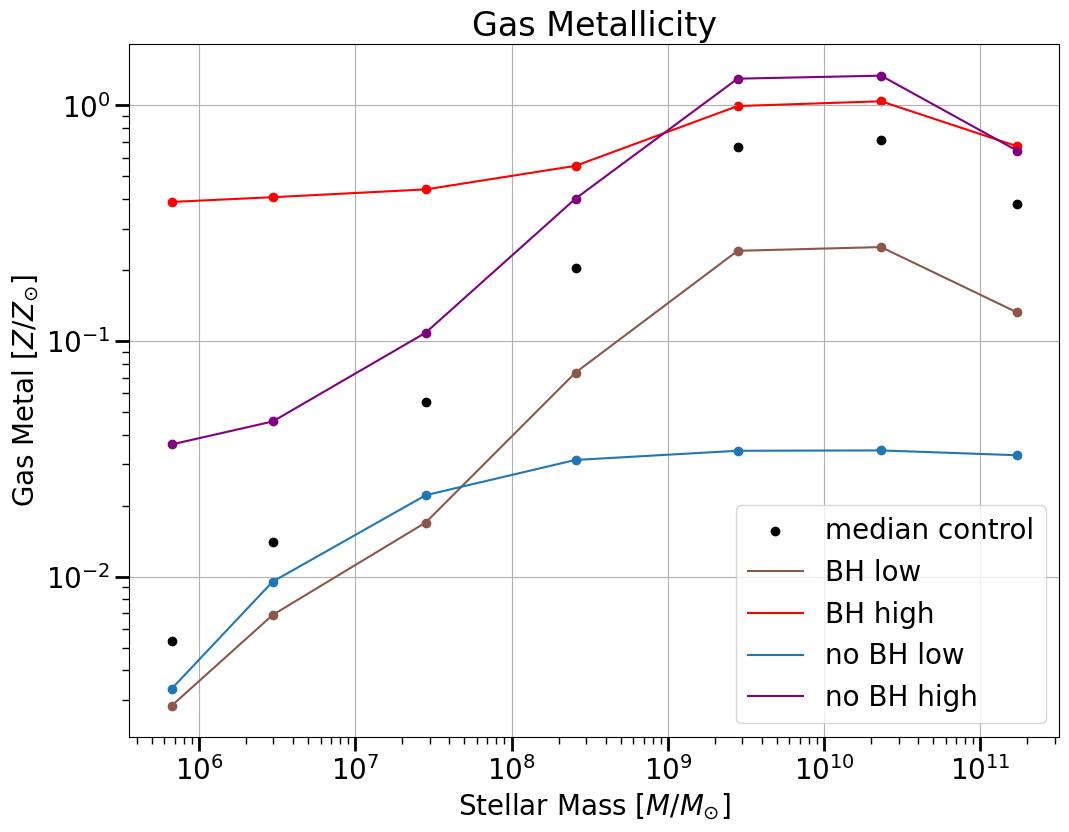

In [48]:
plt.scatter(star_mass_med, gas_median/solar_metal, label = 'median control', c = 'black')
plt.plot(star_mass_med, BH_gas_low_med/solar_metal, label = 'BH low', c = 'tab:brown')
plt.plot(star_mass_med, BH_gas_med_high/solar_metal, label = 'BH high', c = 'red')
plt.plot(star_mass_med, no_BH_gas_med_low/solar_metal, label = 'no BH low', c = 'tab:blue')
plt.plot(star_mass_med, no_BH_gas_med_high/solar_metal, label = 'no BH high', c = 'purple')

plt.scatter(star_mass_med, BH_gas_low_med/solar_metal, c = 'tab:brown')
plt.scatter(star_mass_med, BH_gas_med_high/solar_metal, c = 'red')
plt.scatter(star_mass_med, no_BH_gas_med_low/solar_metal, c = 'tab:blue')
plt.scatter(star_mass_med, no_BH_gas_med_high/solar_metal, c = 'purple')


plt.xscale('log')
plt.yscale('log')

plt.legend(loc = 'lower right')
plt.xlabel('Stellar Mass $[M/M_{\odot}]$')
plt.ylabel('Gas Metal $[Z/Z_{\odot}]$')
plt.title('Gas Metallicity')

plt.grid()
#plt.show()
plt.savefig("./Pictures/gas_cut_ave.png", bbox_inches='tight')

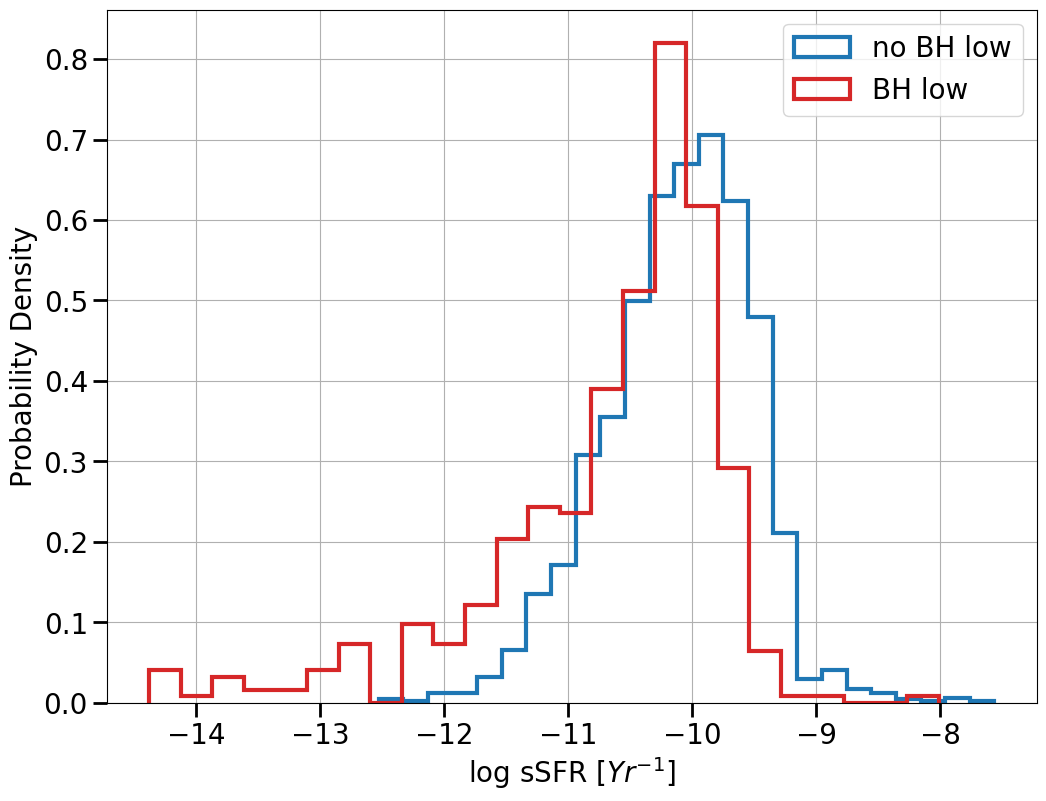

In [49]:
#plt.hist(np.log10(SFR_BH_high/Mstar_BH_high), bins = 25, density = True, histtype = 'step', lw = 3, label = 'BH high')
plt.hist(np.log10(SFR_no_BH_low/Mstar_no_BH_low), bins = 25, density = True, histtype = 'step', lw = 3, label = 'no BH low')
plt.hist(np.log10(SFR_BH_low/Mstar_BH_low), bins = 25, density = True, histtype = 'step', lw = 3, label = 'BH low', color = 'tab:red')
#plt.hist(np.log10(SFR_no_BH_high/Mstar_no_BH_high), bins = 25, density = True, histtype = 'step', lw = 3, label = 'no BH high')


plt.ylabel('Probability Density')
plt.xlabel('log sSFR $[Yr^{-1}]$')
#plt.title('Probability Distribution of sSFR (based on gas cut)')

plt.grid()
plt.legend()
#plt.show()
plt.savefig("./Pictures/gas_sSFR_1.png", bbox_inches='tight')

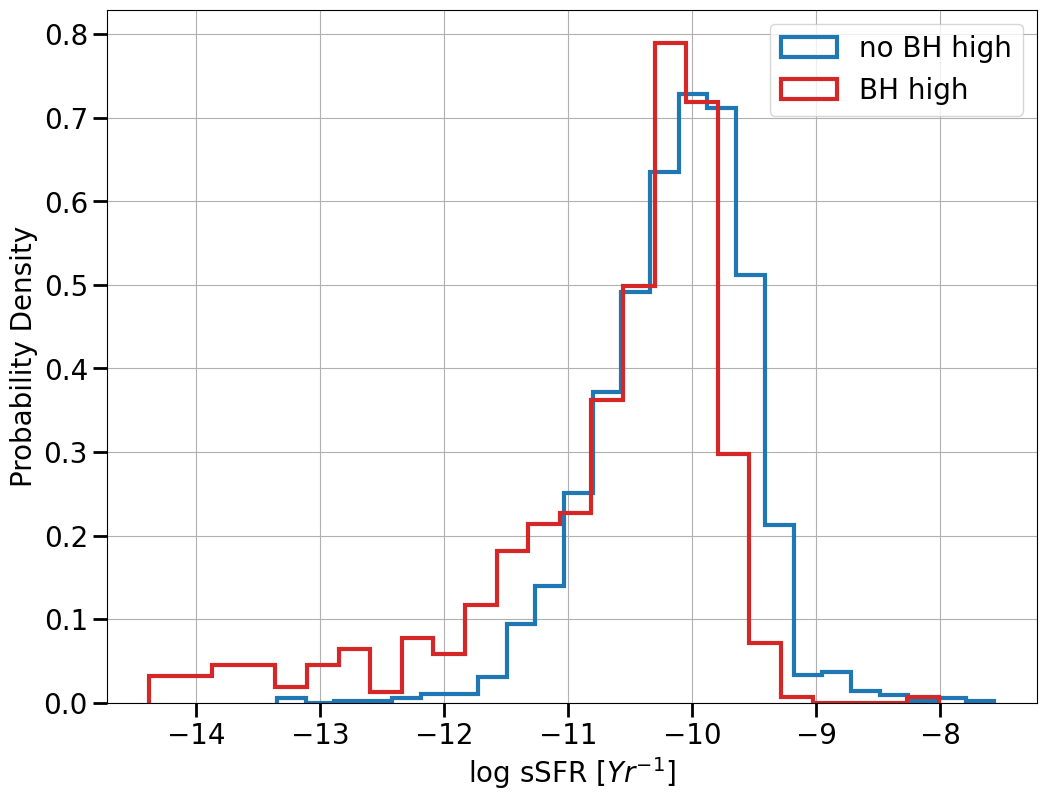

In [50]:
plt.hist(np.log10(SFR_no_BH_high/Mstar_no_BH_high), bins = 25, density = True, histtype = 'step', lw = 3, label = 'no BH high')
plt.hist(np.log10(SFR_BH_high/Mstar_BH_high), bins = 25, density = True, histtype = 'step', lw = 3, label = 'BH high', color = "tab:red")


plt.ylabel('Probability Density')
plt.xlabel('log sSFR $[Yr^{-1}]$')
#plt.title('Probability Distribution of sSFR (based on gas cut)')

plt.grid()
plt.legend()
#plt.show()
plt.savefig("./Pictures/gas_sSFR_2.png", bbox_inches='tight')

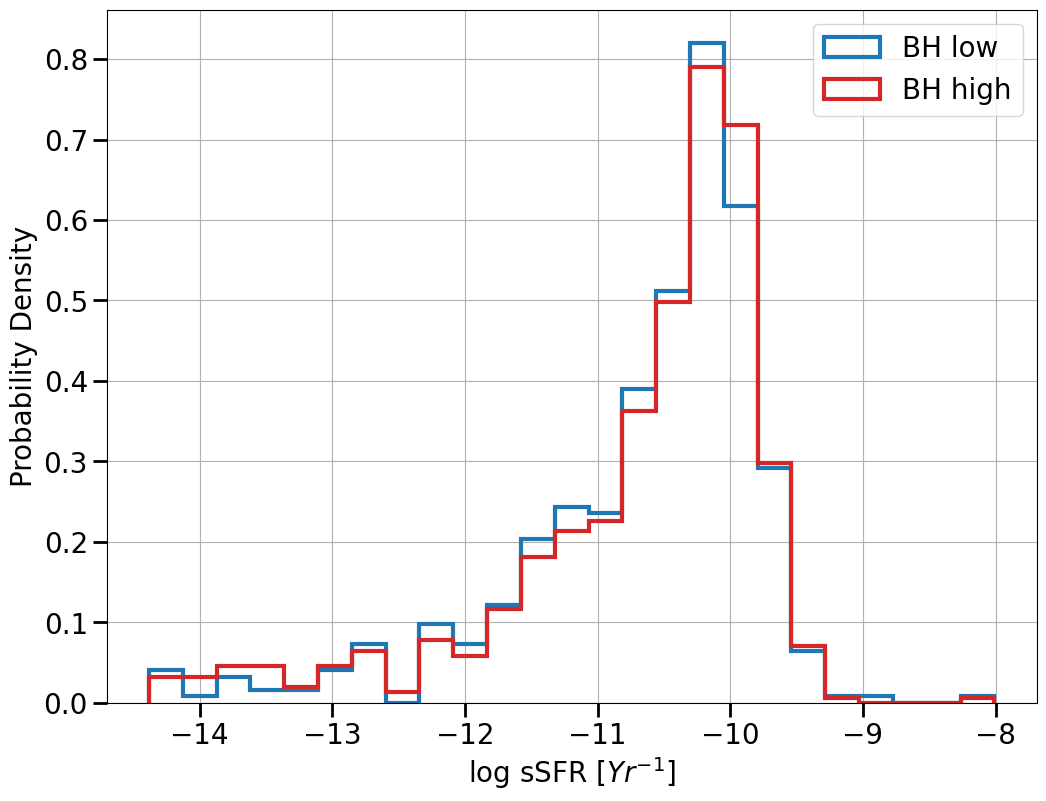

In [51]:
plt.hist(np.log10(SFR_BH_low/Mstar_BH_low), bins = 25, density = True, histtype = 'step', lw = 3, label = 'BH low')
plt.hist(np.log10(SFR_BH_high/Mstar_BH_high), bins = 25, density = True, histtype = 'step', lw = 3, label = 'BH high', color = "tab:red")
#plt.hist(np.log10(SFR_no_BH_high/Mstar_no_BH_high), bins = 25, density = True, histtype = 'step', lw = 3, label = 'no BH high')
#plt.hist(np.log10(SFR_no_BH_low/Mstar_no_BH_low), bins = 25, density = True, histtype = 'step', lw = 3, label = 'no BH low', color = 'tab:red')

plt.ylabel('Probability Density')
plt.xlabel('log sSFR $[Yr^{-1}]$')
#plt.title('Probability Distribution of sSFR (based on gas cut)')

plt.grid()
plt.legend()
#plt.show()
plt.savefig("./Pictures/gas_sSFR_3.png", bbox_inches='tight')

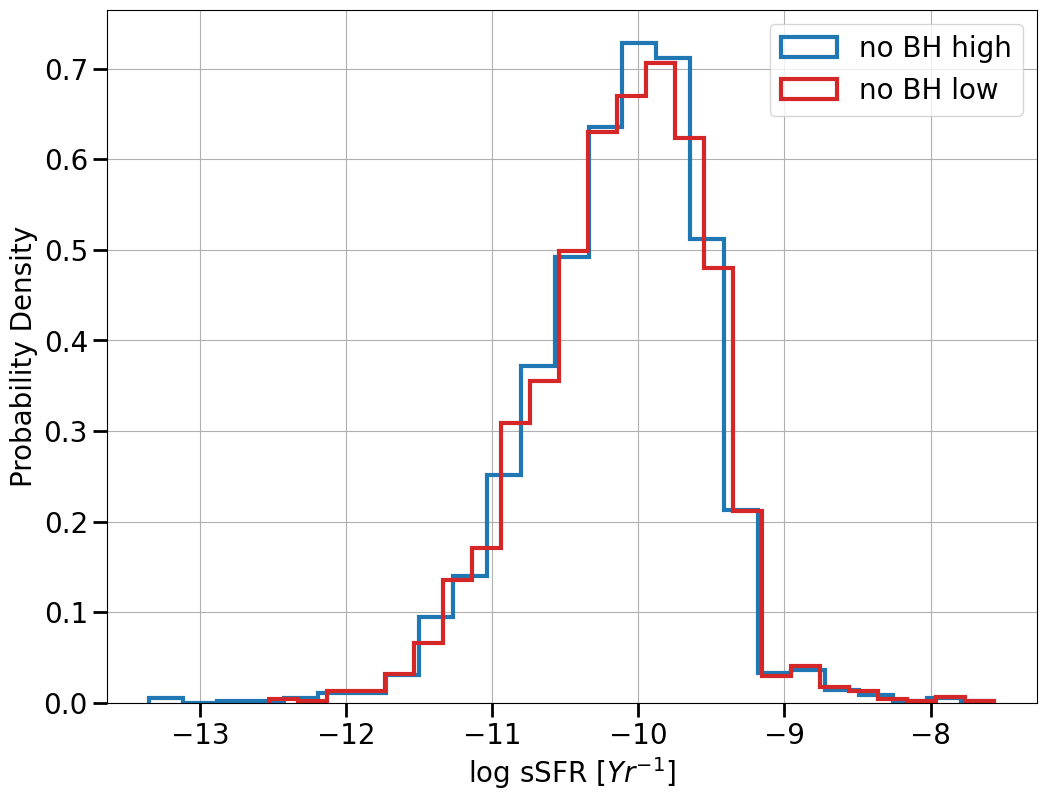

In [52]:
#plt.hist(np.log10(SFR_BH_high/Mstar_BH_high), bins = 25, density = True, histtype = 'step', lw = 3, label = 'BH high')
#plt.hist(np.log10(SFR_BH_low/Mstar_BH_low), bins = 25, density = True, histtype = 'step', lw = 3, label = 'BH low')
plt.hist(np.log10(SFR_no_BH_high/Mstar_no_BH_high), bins = 25, density = True, histtype = 'step', lw = 3, label = 'no BH high')
plt.hist(np.log10(SFR_no_BH_low/Mstar_no_BH_low), bins = 25, density = True, histtype = 'step', lw = 3, label = 'no BH low', color = 'tab:red')

plt.ylabel('Probability Density')
plt.xlabel('log sSFR $[Yr^{-1}]$')

plt.grid()
plt.legend()
#plt.show()
plt.savefig("./Pictures/gas_sSFR_4", bbox_inches='tight')

In [53]:
gas_ave_cut_data = {'gas_median'  : gas_median,
                    'mass_median' : star_mass_med,
                    'BH_met_high' : BH_gas_met_high,
                    'BH_met_low' : BH_gas_met_high,
                    'no_BH_met_high' : no_BH_gas_met_high,
                    'no_BH_met_low' : no_BH_gas_met_low,
                    'note' : 'gas metal data cut and medianed'}

f = open('./Data/gas_ave_cut.pkl', 'wb')
pickle.dump(gas_ave_cut_data, f)
f.close()

f = open('./Data/gas_ave_cut.pkl', 'rb')
gas_ave_cut_data = pickle.load(f)
f.close()

In [54]:
stellar_mass_cut

array([8.25393242e+05, 9.52077348e+05, 8.81809812e+05, ...,
       1.17679621e+11, 1.01494977e+11, 1.41605057e+11])

In [55]:
nums = np.where( (stellar_mass_cut >= 7e8) & (stellar_mass_cut <= 1e9))

In [56]:
nums

(array([2170, 2171, 2173, 2174, 2175, 2177, 2178, 2179, 2180, 2182, 2183,
        2184, 2185, 2187, 2189, 2193, 2194, 2195, 2197, 2198, 2199, 2200,
        2202, 2206, 2208, 2210, 2213, 2214, 2215, 2218, 2222, 2229, 2231,
        2232, 2239, 2244, 2246, 2254, 2256, 2259, 2264, 2270, 2273, 2276,
        2278, 2288, 2298, 2299, 2315, 2336, 2340, 2392, 2423, 2434, 2457,
        2481, 2524, 2556]),)

In [57]:
nums_cut = stellar_mass_cut[nums]

In [58]:
BH_num_low_9[10]

260

In [59]:
halo = db.get_halo('cosmo25/%8192/260')
halo['Mstar']

1375340185.0305586

In [60]:
BH_num_high_9[310]

444

In [61]:
halo = db.get_halo('cosmo25/%8192/444')
halo['Mstar']

1034459316.61798

In [62]:
no_BH_num_high_9[70]

405

In [63]:
halo = db.get_halo('cosmo25/%8192/405')
halo['Mstar']

928373879.5671227

In [64]:
no_BH_num_low_10[49]

457

In [65]:
halo = db.get_halo('cosmo25/%8192/457')
halo['Mstar']

1275634916.62081

In [66]:
def smooth(arr):
    x = np.convolve(arr, np.ones(10)/10, mode = 'same')
    return x

In [67]:
def get_time(arr):
    dt = sim["histogram_delta_t_Gyr"]
    time_sfr = np.arange(len(arr)) * dt + dt/2.
    
    return time_sfr

In [68]:
halo1 = db.get_halo('cosmo25/%8192/260')
halo2 = db.get_halo('cosmo25/%8192/444')
halo3 = db.get_halo('cosmo25/%8192/405')
halo4 = db.get_halo('cosmo25/%8192/457')

In [69]:
halo1['Mstar']

1375340185.0305586

In [70]:
halo2['Mstar']

1034459316.61798

In [71]:
halo3['Mstar']

928373879.5671227

In [72]:
halo4['Mstar']

1275634916.62081

In [73]:
SFR_1 = halo1['SFR_histogram']
SFR_2 = halo2['SFR_histogram']
SFR_3 = halo3['SFR_histogram']
SFR_4 = halo4['SFR_histogram']

In [74]:
SFR_1 = smooth(SFR_1)
SFR_2 = smooth(SFR_2)
SFR_3 = smooth(SFR_3)
SFR_4 = smooth(SFR_4)

In [75]:
time_1 = get_time(SFR_1) # bh low
time_2 = get_time(SFR_2) # bh high
time_3 = get_time(SFR_3) #high
time_4 = get_time(SFR_4) #low

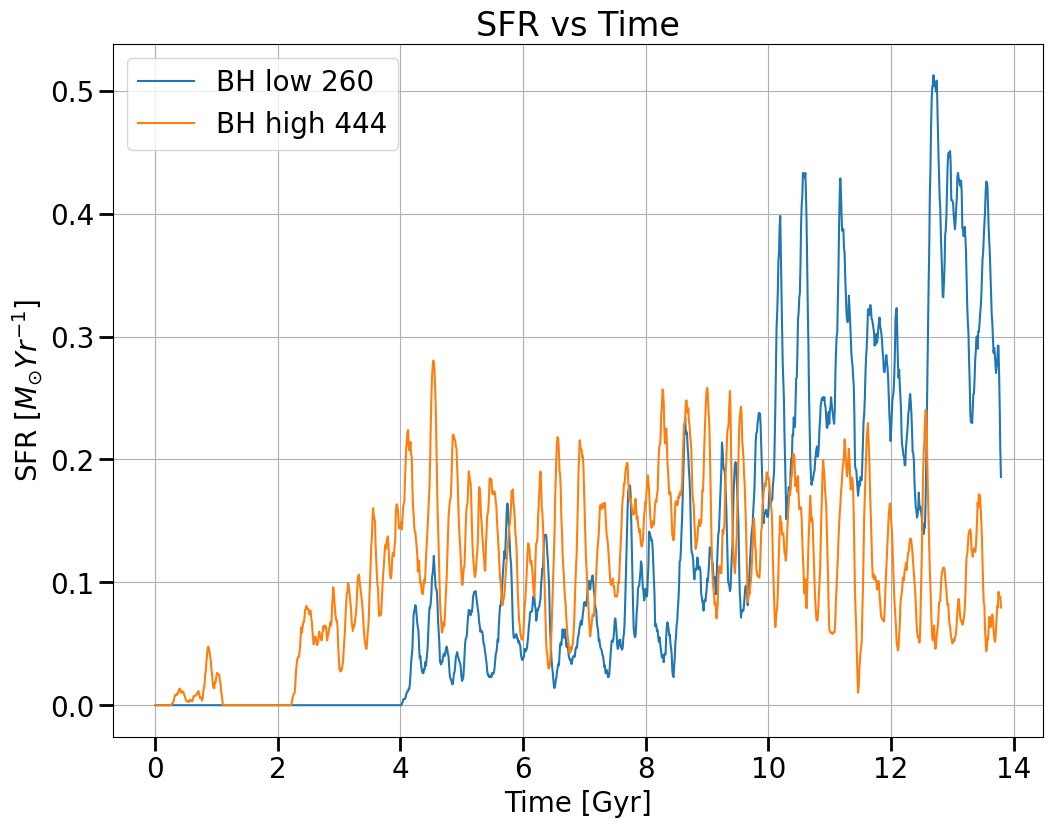

In [76]:
plt.plot(time_1, SFR_1, label = 'BH low 260')

plt.plot(time_2, SFR_2, label = 'BH high 444')

plt.title('SFR vs Time')
plt.xlabel('Time [Gyr]')
plt.ylabel('SFR $[M_{\odot}Yr^{-1}]$')

plt.legend()
plt.grid()
plt.show()

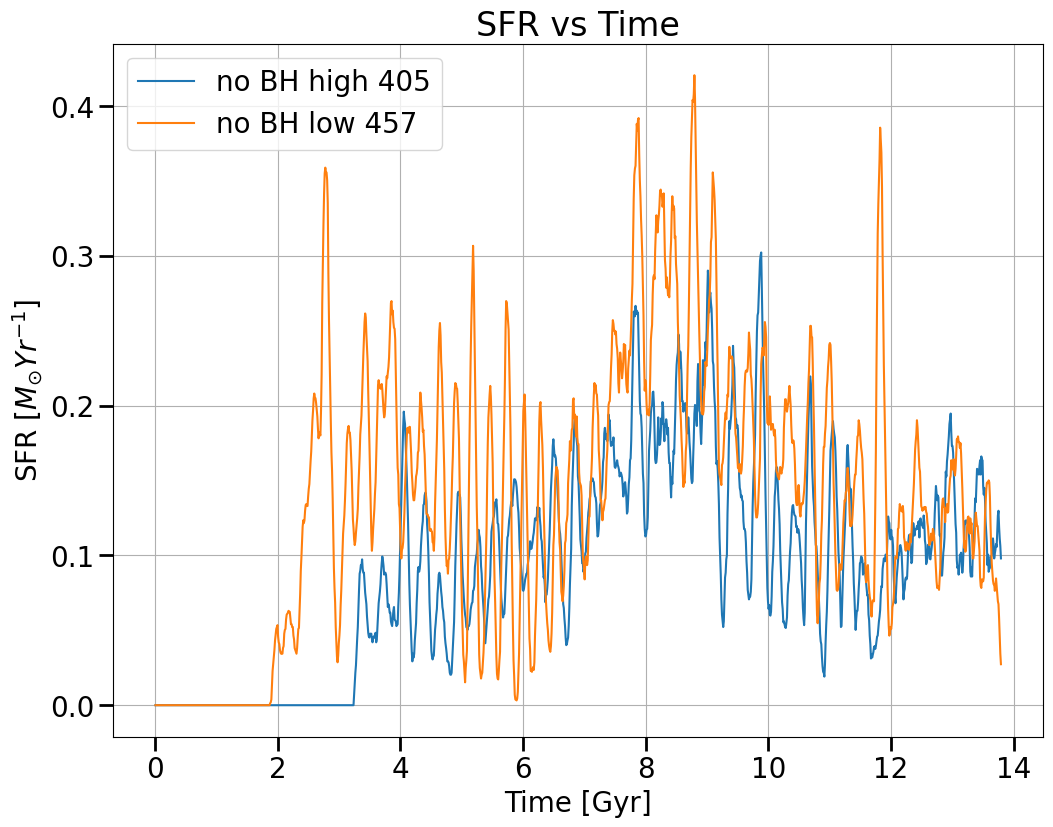

In [77]:

plt.plot(time_3, SFR_3, label = 'no BH high 405')

plt.plot(time_4, SFR_4, label = 'no BH low 457')

plt.title('SFR vs Time')
plt.xlabel('Time [Gyr]')
plt.ylabel('SFR $[M_{\odot}Yr^{-1}]$')

plt.legend()
plt.grid()
plt.show()

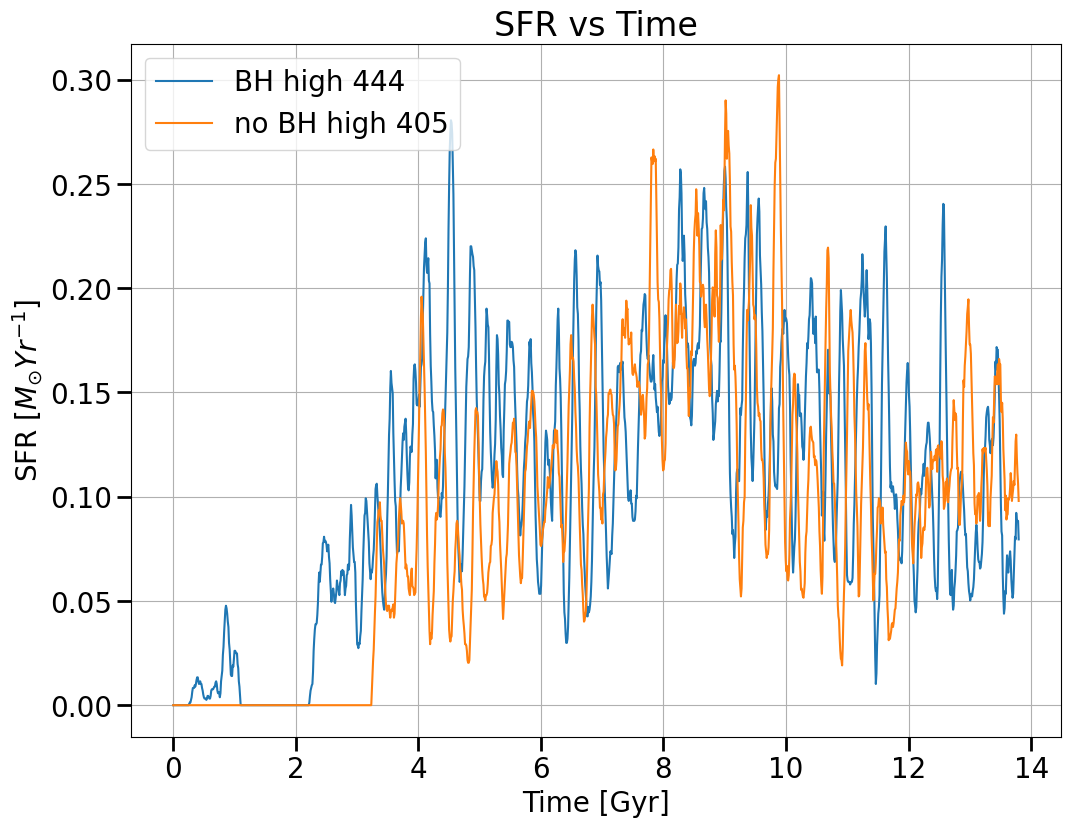

In [78]:
plt.plot(time_2, SFR_2, label = 'BH high 444')
plt.plot(time_3, SFR_3, label = 'no BH high 405')


plt.title('SFR vs Time')
plt.xlabel('Time [Gyr]')
plt.ylabel('SFR $[M_{\odot}Yr^{-1}]$')

plt.legend()
plt.grid()
plt.show()

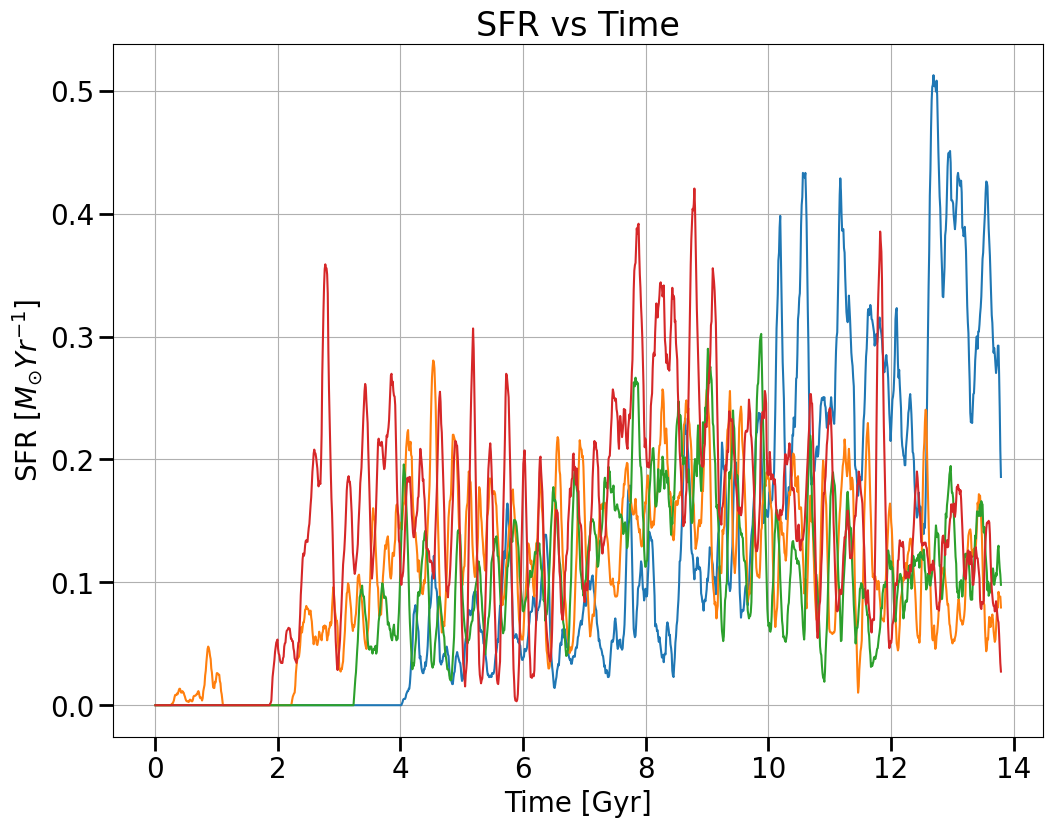

In [79]:
plt.plot(time_1, SFR_1, label = 'BH low 314')
plt.plot(time_2, SFR_2, label = 'BH high 570')
plt.plot(time_3, SFR_3, label = 'no BH high 472')
plt.plot(time_4, SFR_4, label = 'no BH low 370')

plt.title('SFR vs Time')
plt.xlabel('Time [Gyr]')
plt.ylabel('SFR $[M_{\odot}Yr^{-1}]$')

#plt.legend()
plt.grid()
plt.show()

In [80]:
num = np.where(no_BH == 467)
print(num)

(array([102]),)


In [81]:
Mstar_all[467 - 1]

1070132599.2333915

In [82]:
no_BH_gas_metal[102]/solar_metal

0.4007240845157667

In [83]:
gas_median/solar_metal

array([0.00533316, 0.01399079, 0.05502897, 0.20498504, 0.66383339,
       0.71118142, 0.38283498])

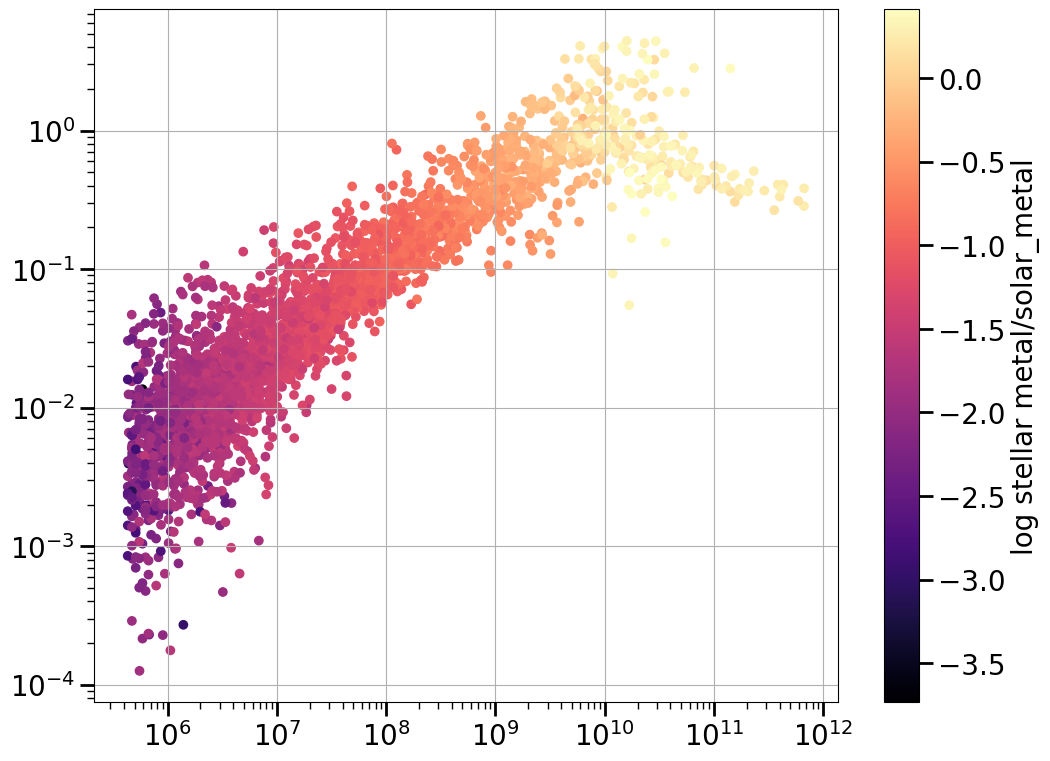

In [84]:
plt.scatter(stellar_mass, gas_metal_all/solar_metal, c = np.log10(stellar_metal_all/solar_metal), cmap = 'magma')

plt.xscale('log')
plt.yscale('log')

plt.colorbar(label = 'log stellar metal/solar_metal')

plt.grid()
plt.show()

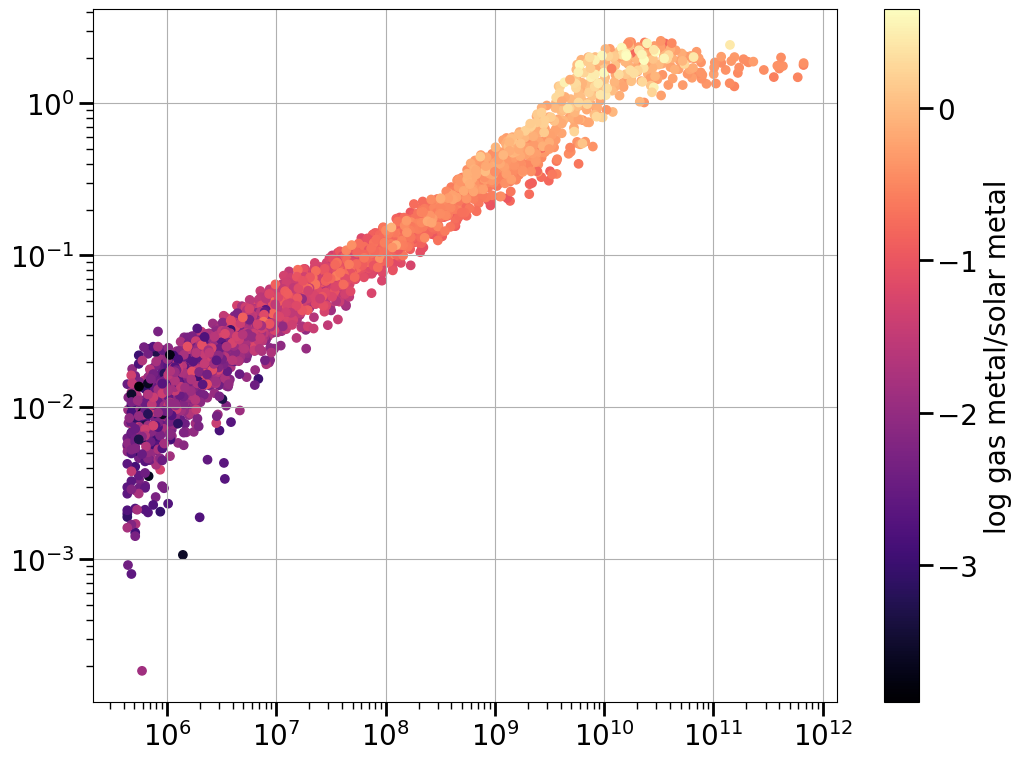

In [85]:
plt.scatter(stellar_mass, stellar_metal_all/solar_metal, c = np.log10(gas_metal_all/solar_metal), cmap = 'magma')

plt.xscale('log')
plt.yscale('log')

plt.colorbar(label = 'log gas metal/solar metal')

plt.grid()
plt.show()